In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec20_Updated.csv


# Exploratory Data Analysis on US Accidents

### Introduction
This dataset contains about 3 million car accident records captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. 

The license to use this dataset can be found [here](https://creativecommons.org/licenses/by-nc-sa/4.0/)

Something about the dataset:

* The dataset contains information about US Accidents
* Can be useful to prevent accidents
* This dataset doesnot contain data about New York

## Loading the dataset

In [2]:
dataset = pd.read_csv('../input/us-accidents/US_Accidents_Dec20_Updated.csv')

## Data preparation and cleaning

In [3]:
dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
dataset

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [5]:
dataset.shape

(2906610, 47)

In [6]:
dataset.describe

<bound method NDFrame.describe of                 ID  Severity           Start_Time             End_Time  \
0              A-1         2  2019-05-21 08:29:55  2019-05-21 09:29:40   
1              A-2         2  2019-10-07 17:43:09  2019-10-07 19:42:50   
2              A-3         2  2020-12-13 21:53:00  2020-12-13 22:44:00   
3              A-4         2  2018-04-17 16:51:23  2018-04-17 17:50:46   
4              A-5         3  2016-08-31 17:40:49  2016-08-31 18:10:49   
...            ...       ...                  ...                  ...   
2906605  A-2906606         2  2018-06-28 08:49:01  2018-06-28 09:18:51   
2906606  A-2906607         2  2019-01-10 02:01:01  2019-01-10 02:30:32   
2906607  A-2906608         2  2020-11-23 12:52:00  2020-11-24 00:47:37   
2906608  A-2906609         2  2019-12-29 22:38:00  2019-12-29 23:38:00   
2906609  A-2906610         2  2018-03-26 13:35:03  2018-03-26 14:39:00   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0     

In [7]:
dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Finding the number of numerical columns using pandas.

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = dataset.select_dtypes(include=numerics)
len(numeric_df.columns)

14

So this dataset contains 14 numerical columns.

Now lets find the percentage of missing values or incorrect values in this dataset.

In [10]:
missing_values_percent_per_col = (dataset.isna().sum().sort_values(ascending = False) / len(dataset)) * 100
missing_values_percent_per_col

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Sunrise_Sunset            0.003784
Civil_Twilight            0.003784
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
City                      0.003716
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming     

We can see that some of the columns have missing values in them.

Lets show the percentage of missing values on bar plot.
 
Some of the columns have zero percentages in them. We don't want to show them on plot. So, we will filter out those columns.



In [11]:
import seaborn as sns
sns.set_style("darkgrid")

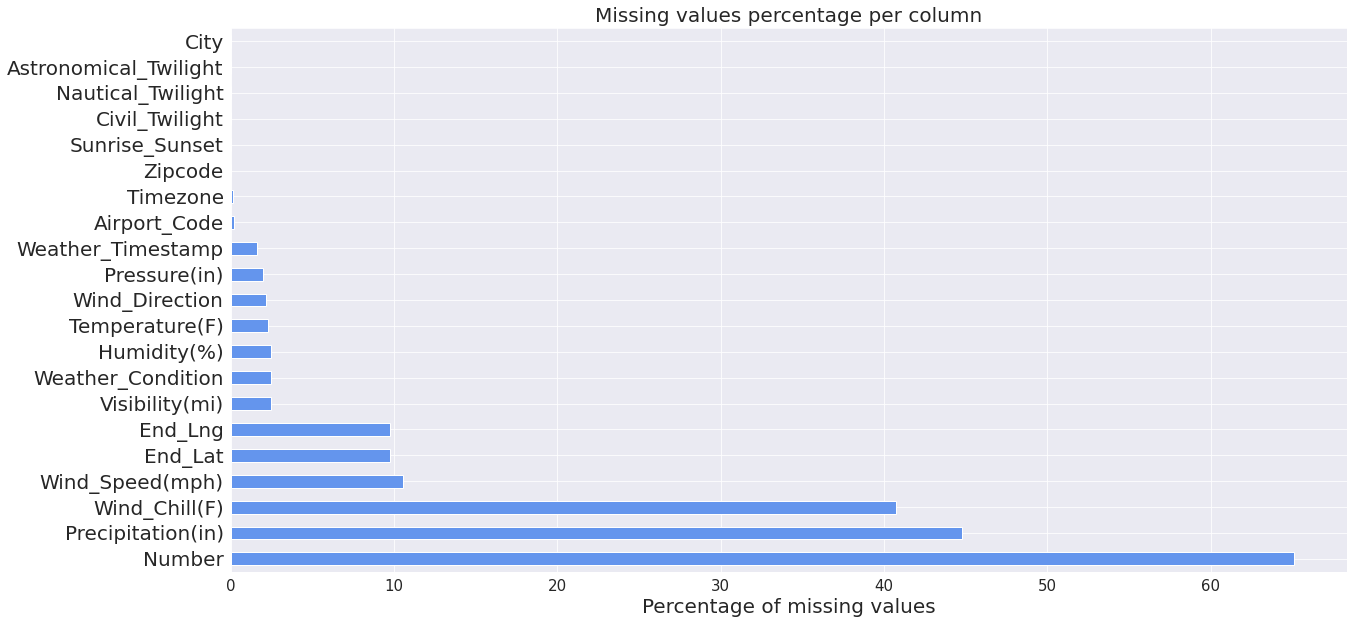

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
missing_values_percent_per_col[missing_values_percent_per_col != 0].plot.barh(color = 'cornflowerblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of missing values', fontsize=20)
plt.title('Missing values percentage per column', fontsize = 20)

plt.show()


In [13]:
dataset.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Exploratory analysis and Visualization

Columns that we will analyse:
1. City
2. Start_Time
3. Start_Lat, Start_Lng
4. Temperature(F)
5. Weather_Condition


In [14]:
dataset.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [15]:
cities = dataset.City.unique()
len(cities)

11790

This dataset contains data from 11790 US cities. According to world population review, there are over 19,000 incorporated places registered in the US. This implies that this dataset does not contain information about every city in the US.

We can see the cities with major number of accidents.

In [16]:
cities_by_accidents = dataset.City.value_counts()
cities_by_accidents

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
Northvale            1
Nodaway              1
Rapid River          1
Turners Falls        1
Saint Jacob          1
Name: City, Length: 11789, dtype: int64

It looks like Los Angeles has the highest number of accidents recorded in the US but the most populated city in the US is New york. We have to check if this dataset contains data from New york or not.

In [17]:
cities_by_accidents[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [18]:
'New York' in dataset.City

False

In [19]:
'NY' in dataset.State

False

Thus, this dataset doesnot contain data from New York city.

Let's plot a bar graph for the top 20 cities with major accidents in the US.

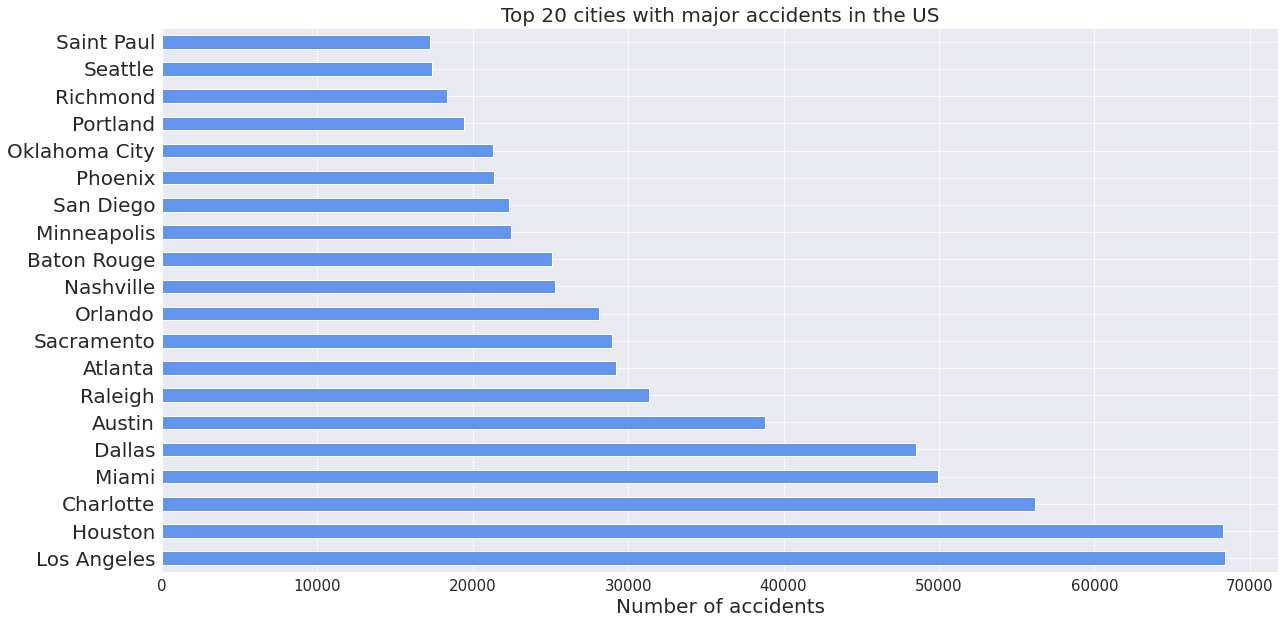

In [20]:
plt.figure(figsize=(20,10))
cities_by_accidents[:20].plot.barh(color = 'cornflowerblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Number of accidents', fontsize=20)
plt.title('Top 20 cities with major accidents in the US', fontsize = 20)

plt.show()

To check if a lot of cities have small number of accidents or large number of accidents, we can plot a histogram.

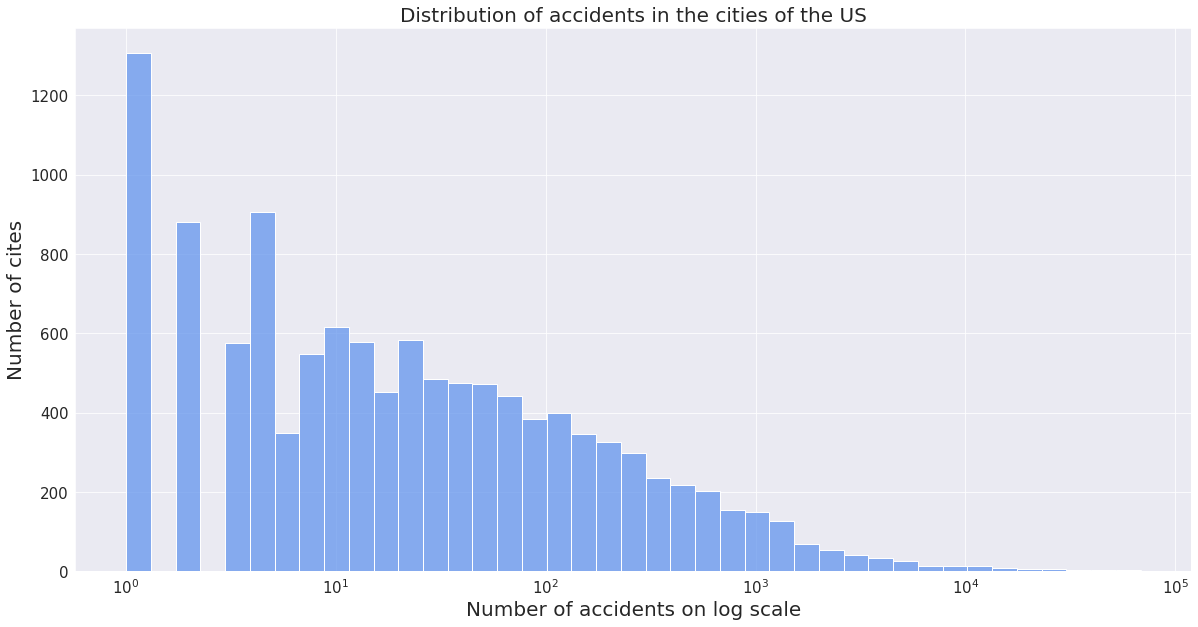

In [21]:
plt.figure(figsize=(20,10))
sns.histplot(cities_by_accidents, log_scale = True, color = 'cornflowerblue')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Number of accidents on log scale', fontsize=20)
plt.ylabel('Number of cites', fontsize=20)

plt.title('Distribution of accidents in the cities of the US', fontsize = 20)

plt.show()

From the bar graph, we can see that only few cities have higher number of accidents while the rest have smaller number of accidents. There is an exponential decrease in the number of accidents per city.
Let's seggregate the cities by high accidents and low accidents.

In [22]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

Let's find out the percentage of cities with more than 1000 accidents yearly i.e. percentage of high accident cities.

In [23]:
(len(high_accident_cities) / len(cities)) * 100

4.351145038167939

It shows that about 4 percent of the cities record more than 1000 accidents per year.

In [24]:
cities_by_accidents[cities_by_accidents ==1]

North Walpole    1
Searsboro        1
Beach Haven      1
Roxie            1
Martville        1
                ..
Northvale        1
Nodaway          1
Rapid River      1
Turners Falls    1
Saint Jacob      1
Name: City, Length: 1306, dtype: int64

Over 1300 cities have reported just 1 accident throughout the year. This needs to be investigated.

## Start Time

In [25]:
dataset.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

The Start_Time column of the dataset is of object data type which cannot be used for effective analysis. So, we have to convert its data type from object to datetime format.

In [26]:
dataset.Start_Time = pd.to_datetime(dataset.Start_Time)

In [27]:
dataset.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

We can now pull out pieces of information from the timestamp to get insights like:
* The distribution of accidents in a day.
* Day of the week with more accidents.
* Trend of accidents over a year and so on.

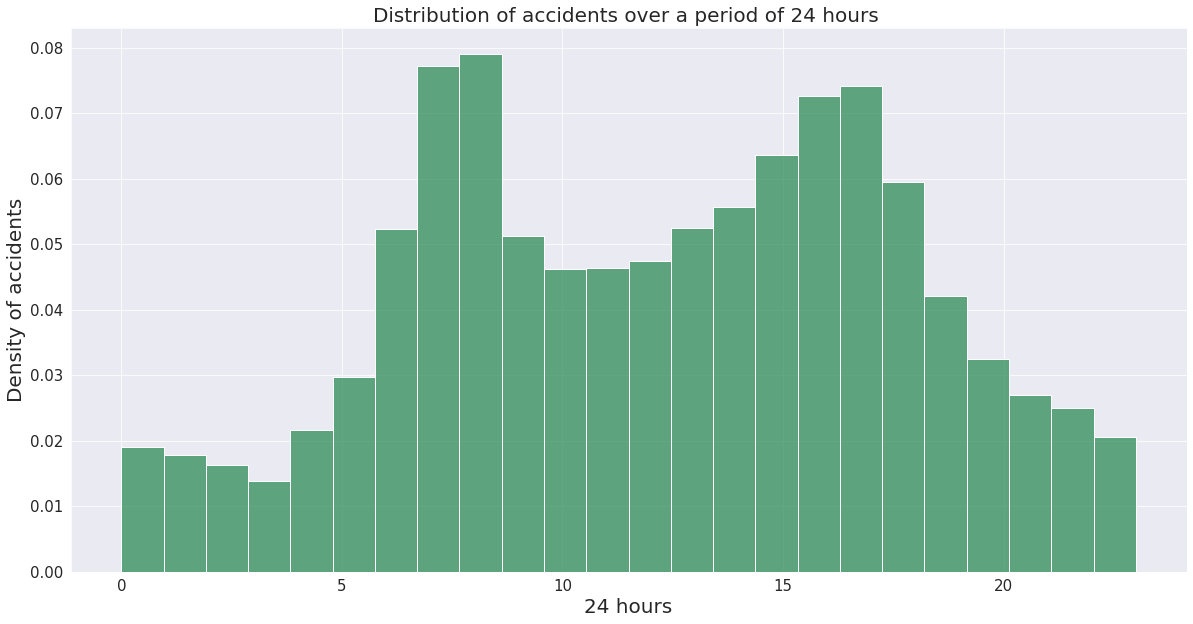

In [28]:
plt.figure(figsize=(20,10))
sns.histplot(data = dataset.Start_Time.dt.hour, stat = 'density', bins=24, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('24 hours', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents over a period of 24 hours ', fontsize = 20)

plt.show()

From the above graph, we can observe 2 peaks. This implies that a higher percentage of accidents occur between 6 AM to 10 AM in the morning and 2 PM to 6 PM in the evening probably because people tend to be in a hurry to get to work and return from work. 

Let's plot the distribution of accidents over a week.

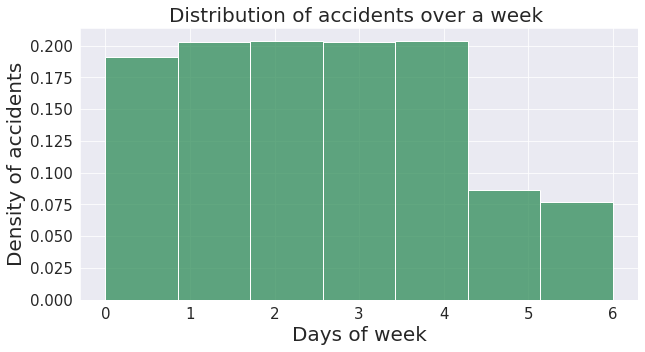

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data = dataset.Start_Time.dt.dayofweek,stat = 'density', bins=7, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Days of week', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents over a week ', fontsize = 20)

plt.show()

We can observe from the plot that the distribution of accidents over weekdays almost remain constant while it decreases for weekends probably because of holidays. (0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday)

Let's check if the distribution of accidents by hour on weekends remains the same as that on weekdays.


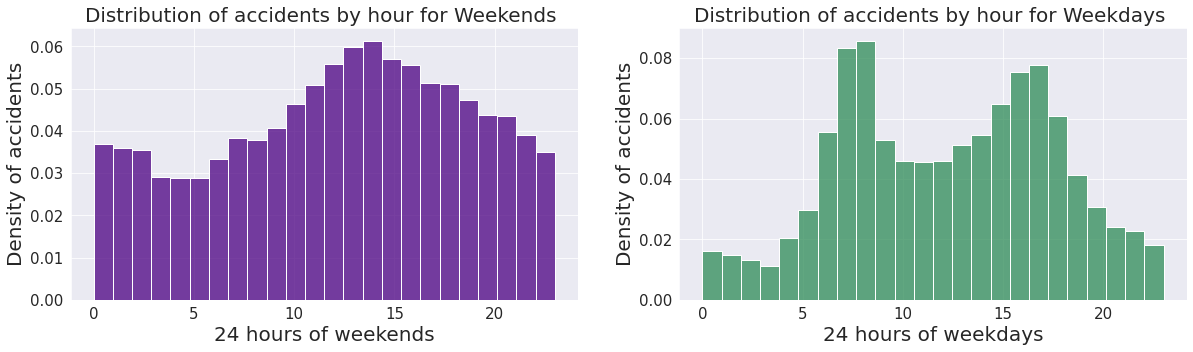

In [30]:
weekends_start_time = dataset.Start_Time[dataset.Start_Time.dt.dayofweek >= 5]
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(data = weekends_start_time.dt.hour, stat = 'density', bins=24, color = 'indigo')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('24 hours of weekends', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents by hour for Weekends ', fontsize = 20)

# subplot method is used to plot the two graphs side by side

weekdays_start_time = dataset.Start_Time[dataset.Start_Time.dt.dayofweek <= 4]

plt.subplot(1, 2, 2)
sns.histplot(data = weekdays_start_time.dt.hour, stat = 'density', bins=24, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('24 hours of weekdays', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents by hour for Weekdays ', fontsize = 20)

plt.show()

From the above two plots, it can be very well observed that the trend of accidents on weekends is entirely different from that on weekdays. 
* The peak for weekends occur between 10 AM to 5 PM unlike that for weekdays.


Let's have a look at the distribution of accidents for months.

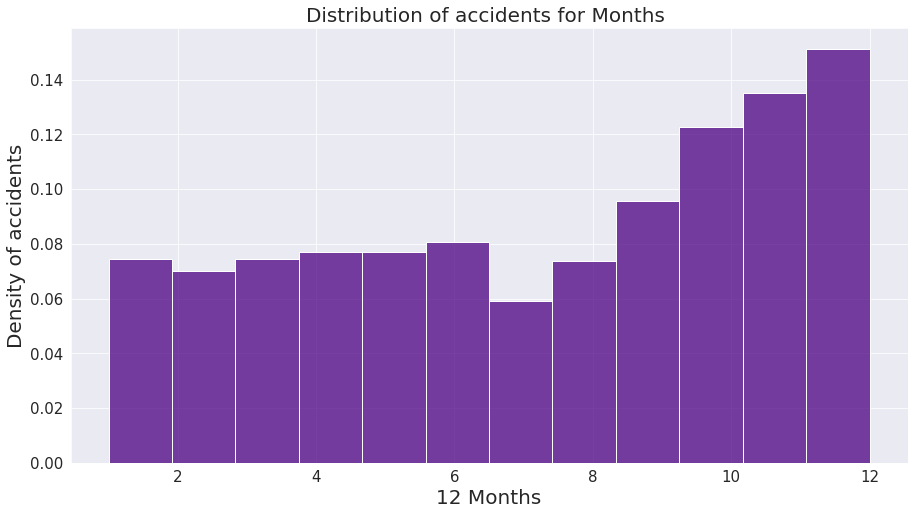

In [31]:
plt.figure(figsize=(15,8))
sns.histplot(data = dataset.Start_Time.dt.month, stat = 'density', bins=12, color = 'indigo')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('12 Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for Months ', fontsize = 20)

plt.show()

From the above plot, it can be seen that more number of accidents occur around the month of december. 
Let's look at year by year plot to verify that this trend is consistent and to rule out any possibility of missing data.

In [32]:
dataset_2016 = dataset[dataset.Start_Time.dt.year == 2016]
dataset_2017 = dataset[dataset.Start_Time.dt.year == 2017]
dataset_2018 = dataset[dataset.Start_Time.dt.year == 2018]
dataset_2019 = dataset[dataset.Start_Time.dt.year == 2019]
dataset_2020 = dataset[dataset.Start_Time.dt.year == 2020]

The dataset has been divided based on years. Let's plot the distribution of accidents for these years.

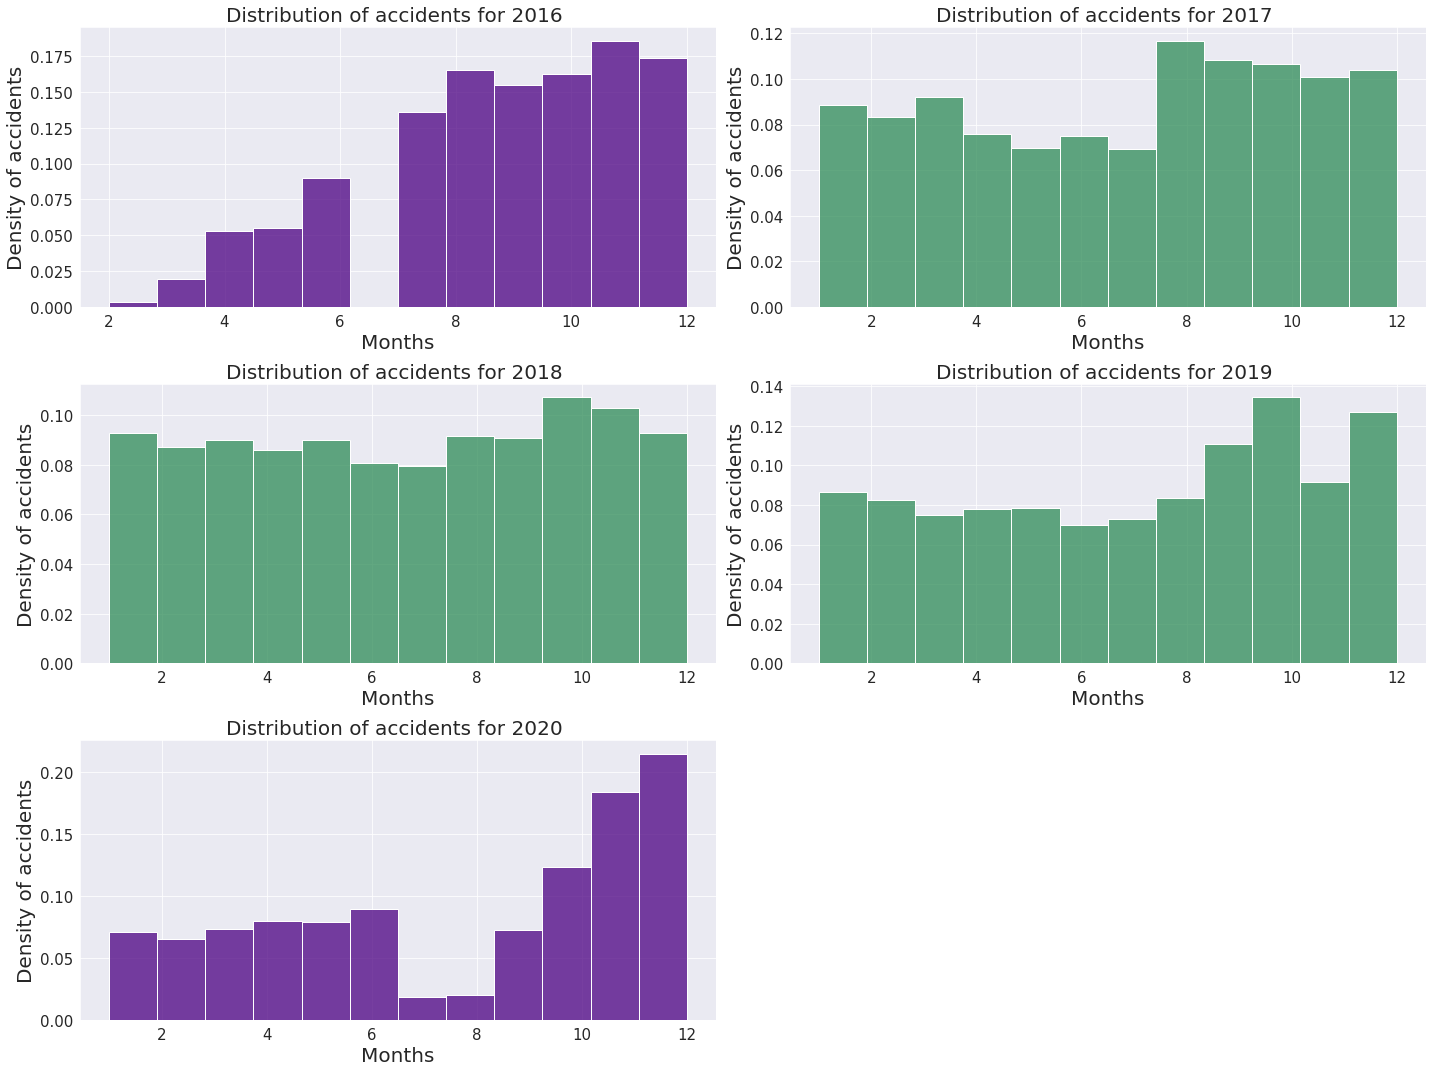

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(3, 2, 1)                            # To put more than one plot in a cell
sns.histplot(data = dataset_2016.Start_Time.dt.month, stat = 'density', bins=12, color = 'indigo')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for 2016 ', fontsize = 20)

# subplot method is used to plot the two graphs side by side

plt.subplot(3, 2, 2)
sns.histplot(data = dataset_2017.Start_Time.dt.month, stat = 'density', bins=12, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for 2017 ', fontsize = 20)

plt.subplot(3, 2, 3)
sns.histplot(data = dataset_2018.Start_Time.dt.month, stat = 'density', bins=12, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for 2018 ', fontsize = 20)

plt.subplot(3, 2, 4)
sns.histplot(data = dataset_2019.Start_Time.dt.month, stat = 'density', bins=12, color = 'seagreen')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for 2019 ', fontsize = 20)

plt.subplot(3, 2, 5)
sns.histplot(data = dataset_2020.Start_Time.dt.month, stat = 'density', bins=12, color = 'indigo')
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Density of accidents', fontsize=20)

plt.title('Distribution of accidents for 2020 ', fontsize = 20)


plt.tight_layout()       # to adjust all the plots in such a way that they do not overlap each other.
plt.show()

After looking at the above plots, we observe that, the distribution for the years 2017, 2018 and 2019 seems more or less balanced with slight variation. But, when the trend for the years 2016 and 2020 are compared with that of the rest years, there is a significant variation in the distribution of accidents. This could mean that some data is missing for the years 2016 and 2020. The covid pandemic started in the year 2020 so, it might also be one the reasons for this variation in the trend in the year 2020 because of lockdown all over the US.

In [34]:
accident_count = [dataset_2016.shape[0], dataset_2017.shape[0], dataset_2018.shape[0], dataset_2019.shape[0], dataset_2020.shape[0]]
years = [2016, 2017, 2018, 2019, 2020]

Text(0.5, 1.0, 'Distribution of accidents year over year ')

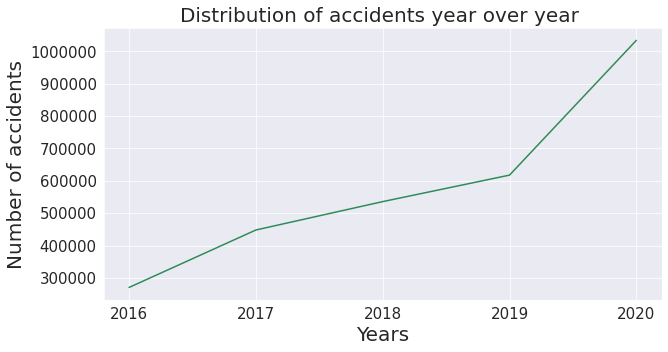

In [35]:
plt.figure(figsize=(10,5))

sns.lineplot(x=years, y=accident_count, color = 'seagreen')
plt.ticklabel_format(style='plain')
plt.xticks(fontsize=15)
plt.xticks(years)

plt.yticks(fontsize=15)

plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of accidents', fontsize=20)

plt.title('Distribution of accidents year over year ', fontsize = 20)


From the above graph, we can observe an increasing trend in the number of accidents year over year.

## Start Latitude and Start Longitude

In [36]:
dataset.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [37]:
dataset.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

Let's make a scatter plot to get an idea of the distribution of accidents in the US. But first, we have to reduce the number of points as there are about 3 million data points.

Text(0.5, 1.0, 'Distribution of accidents ')

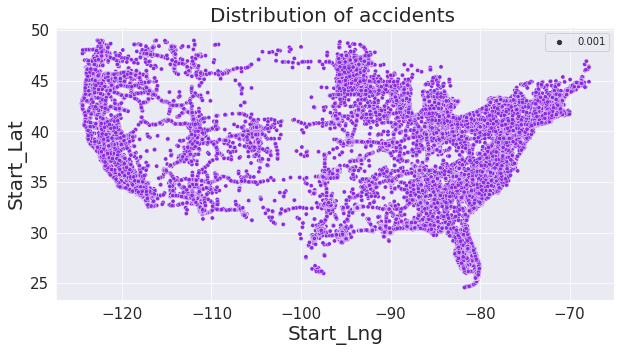

In [38]:
plt.figure(figsize=(10,5))

# Reducing the dataset
sample_df = dataset.sample(int(0.1 * len(dataset)))     
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001, color = 'blueviolet')

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Start_Lng',fontsize=20)
plt.ylabel('Start_Lat', fontsize=20)

plt.title('Distribution of accidents ', fontsize = 20)

We can see from the above scatter plot, that the density of accidents near the coastline is more compared to the center.

Let's show the accident points on a map to get a clear picture of the distribution of accidents over the US.

In [39]:
import folium

In [40]:
# Reducing the number of datapoints to add them on the map

sample1_df = dataset.sample(int(0.001 * len(dataset)))
lat_lon = list(zip(list(sample1_df.Start_Lat), list(sample1_df.Start_Lng)))

In [41]:
# Specifying the center coordinates to position the map to show the US
center = [39.8097343, -98.5556199]

# Adding data points on the Map
map_us = folium.Map(location=center, zoom_start=4)
for i in range(0,len(lat_lon)):
    folium.Marker(lat_lon[i]).add_to(map_us)

#displaying the map
map_us

## Temperature

In [42]:
dataset['Temperature(F)']

0          76.0
1          76.0
2          51.0
3          53.6
4          84.2
           ... 
2906605    84.2
2906606    46.9
2906607    76.0
2906608    27.0
2906609    51.1
Name: Temperature(F), Length: 2906610, dtype: float64

Seggregating the accidents based on hot and cold climate. Above 70 degrees F is chosen as hot climate and below it is chosen to be cold climate.

In [43]:
cold_temp_count = len(dataset[dataset['Temperature(F)'] < 70.0])
hot_temp_count = len(dataset[dataset['Temperature(F)'] >= 70.0])

Let's plot a pie chart to better visualize the accidents in cold and hot temperature

In [44]:
# Setting up the labels for the pie chart
lab = ['Accidents in cold climate', 'Accidents in hot climate', 'Accidents without temperature records']

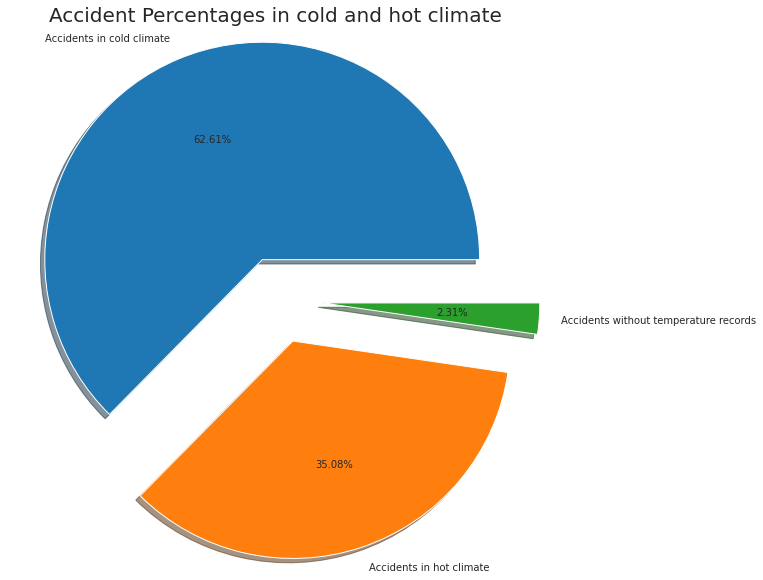

In [45]:
plt.figure(figsize=(20,10))
plt.pie([cold_temp_count, hot_temp_count, len(dataset) - cold_temp_count - hot_temp_count], labels = lab, autopct = '%0.2f%%', shadow = True, explode = [0.2,0.2,0.2], textprops={'fontsize': 10})
plt.title('Accident Percentages in cold and hot climate ', fontsize = 20)
plt.show()

From the above chart, we can see that about 62 percent of the accidents occur in colder areas while 35 percent of the accidents occur in hotter areas.

## Weather Condition

Calculating the percentage of accidents on certain weather condition.

In [46]:
accident_weather_condition = (dataset.Weather_Condition.value_counts() / len(dataset)) * 100
accident_weather_condition = accident_weather_condition.sort_values(ascending = False)

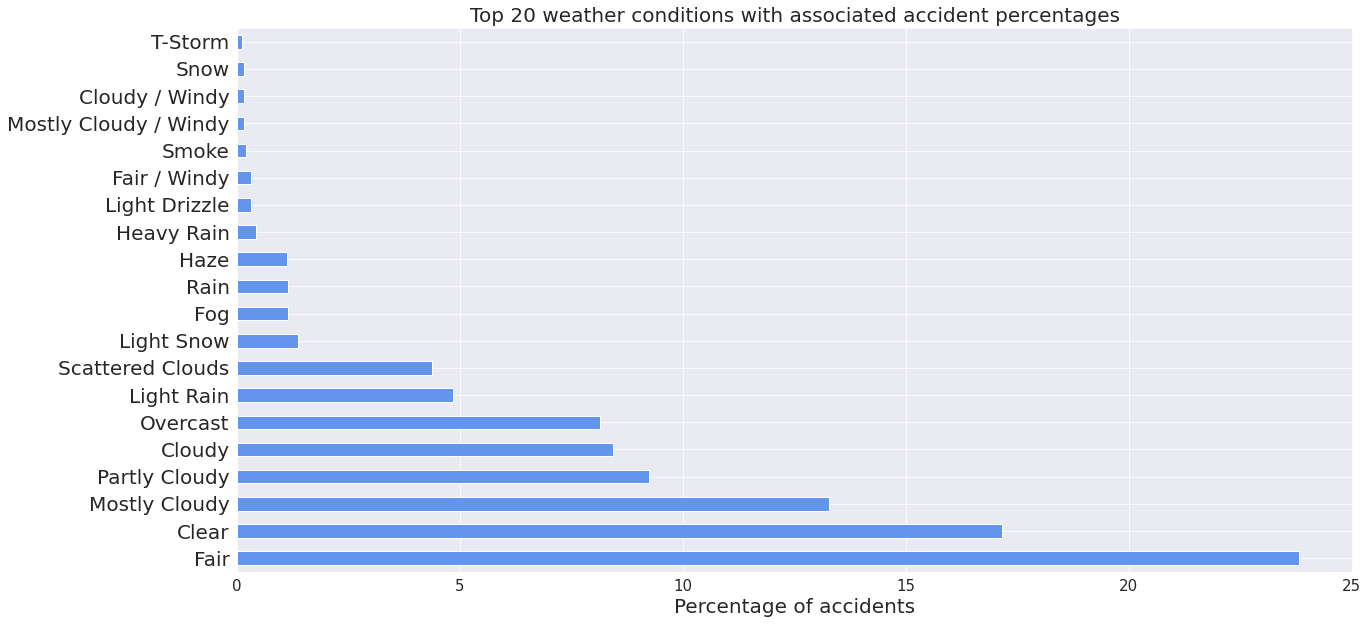

In [47]:
plt.figure(figsize=(20,10))
accident_weather_condition[:20].plot.barh(color = 'cornflowerblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of accidents', fontsize=20)
plt.title('Top 20 weather conditions with associated accident percentages', fontsize = 20)

plt.show()

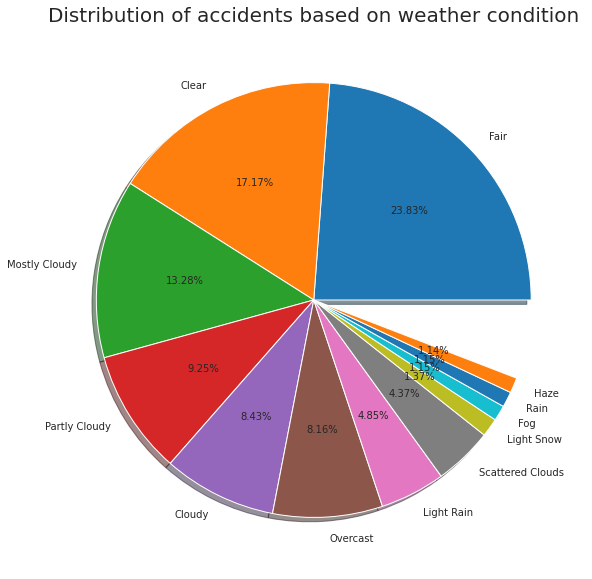

In [48]:
plt.figure(figsize=(20,10))
(dataset.Weather_Condition.value_counts() / len(dataset))[0:12].plot(kind='pie',autopct = '%0.2f%%', normalize = False, shadow = True)
plt.ylabel("")
plt.title('Distribution of accidents based on weather condition', fontsize = 20)
plt.show()

From the above bar graph and pie chart, we can observe that the majority of accidents occur in Fair, Clear, Mostly cloudy, Partly cloudy , Cloudy and overcast conditions. The rest conditions result in less than 5 percent accident for each condition.

Let's make a correlation matrix for all the variables in the dataset.

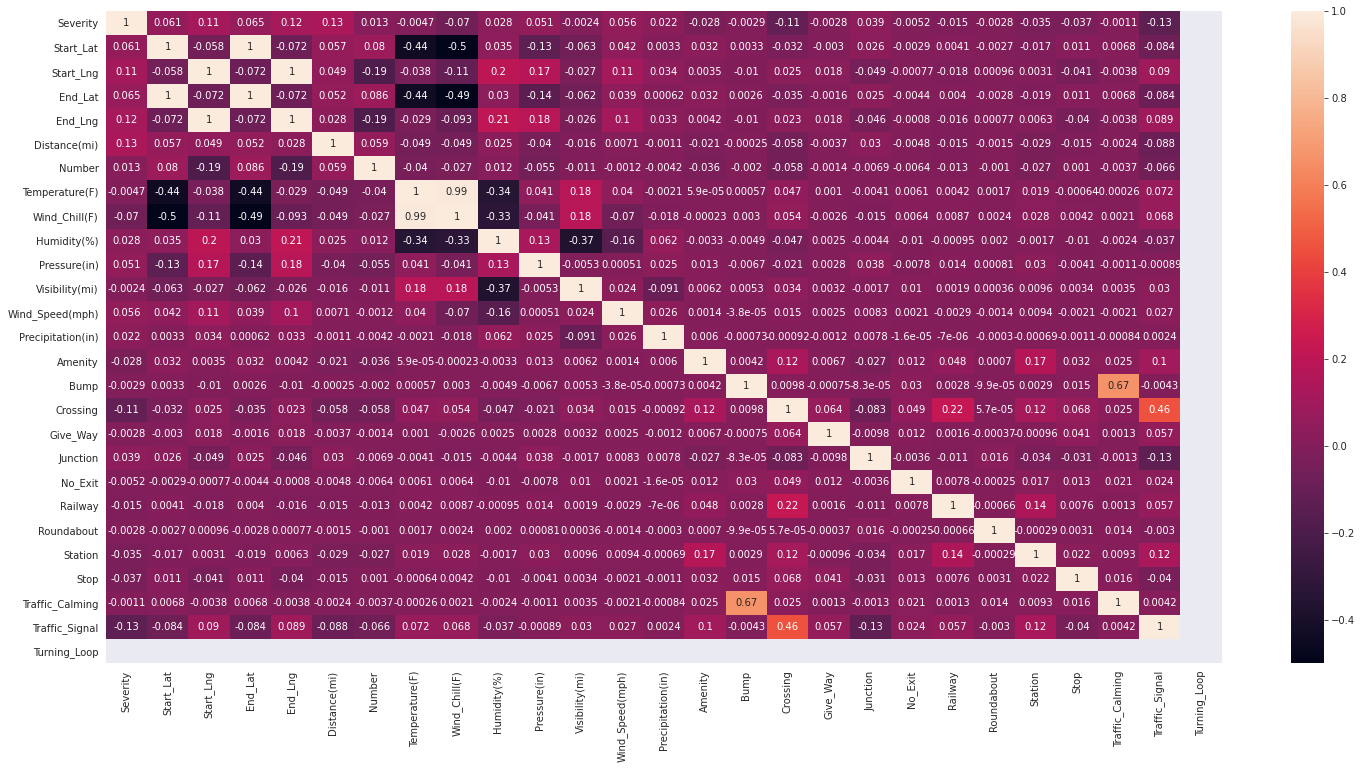

In [49]:
cor= dataset.corr()
plt.figure(figsize=(25,12))
sns.heatmap(cor, annot=True)
plt.show()

There is a strong correlation between Traffic_calming and Bump.

# Summary and conclusions
### Insights:

* This dataset does not contain data from New York city.
* There is an exponential decrease in the number of accidents per city.
* About 4 percent of the cities record more than 1000 accidents per year.
* Over 1300 cities have reported just 1 accident throughout the year. This needs to be investigated.
* A higher percentage of accidents occur between 6 AM to 10 AM in the morning and 2 PM to 6 PM in the evening probably because people tend to be in a hurry to get to work and return from work.
* The peak for weekends occur between 10 AM to 5 PM unlike that for weekdays.
* More number of accidents occur around the month of december.
* An increasing trend is observed in the number of accidents year over year.
* Density of accidents near the coastline is more compared to the center.
* About 62 percent of the accidents occur in colder areas while 35 percent of the accidents occur in hotter areas.
* Majority of accidents occur in Fair, Clear, Mostly cloudy, Partly cloudy , Cloudy and overcast conditions.


There are so many more columns in this dataset that can be analysed for some interesting insights.